### Phase kickback

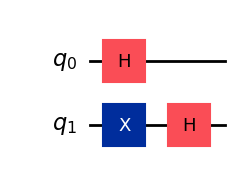

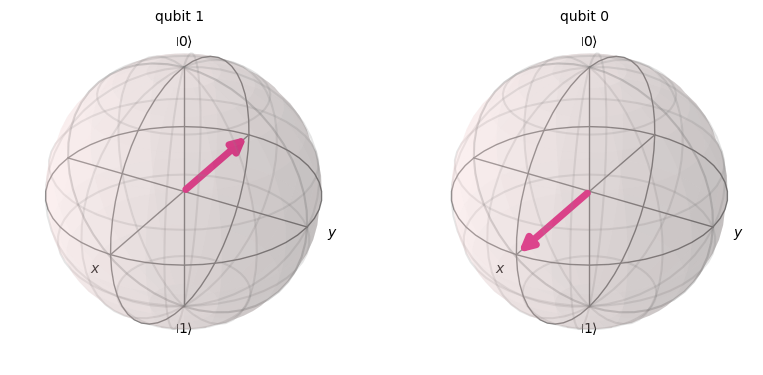

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

circ = QuantumCircuit(2)
circ.x(1)
circ.h(0)
circ.h(1)
display(circ.draw('mpl'))

state = Statevector(circ)
display(plot_bloch_multivector(state, reverse_bits=True))

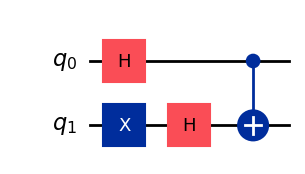

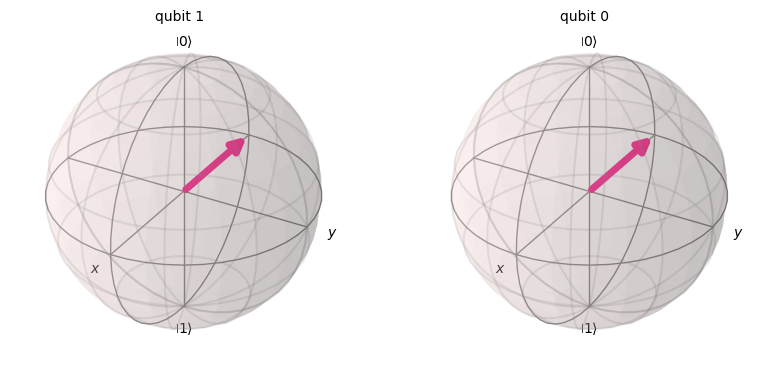

In [2]:
circ.cx(0, 1)
display(circ.draw('mpl'))
state = Statevector(circ)
display(plot_bloch_multivector(state, reverse_bits=True))

### When does phase kickback kick in?

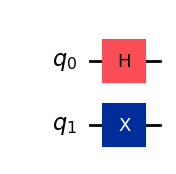

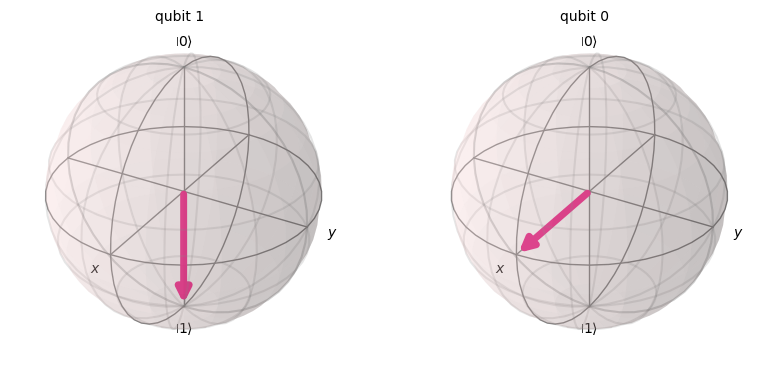

In [3]:
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
#circ.cz(0, 1) # Controlled Z gate

display(circ.draw('mpl'))
state = Statevector(circ)
display(plot_bloch_multivector(state, reverse_bits=True))

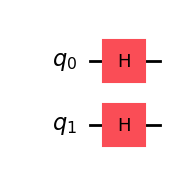

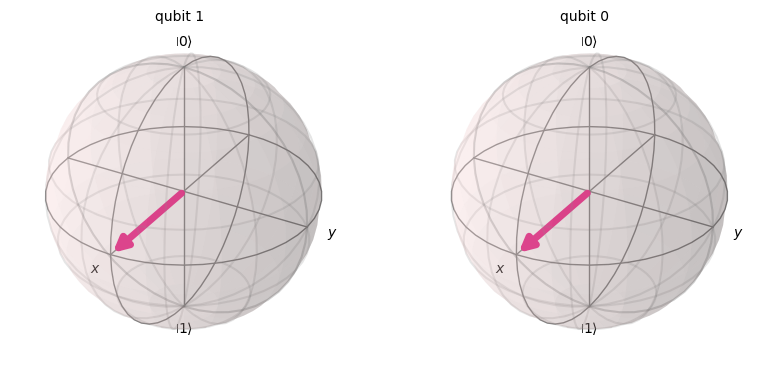

In [4]:
circ = QuantumCircuit(2)
circ.h([0, 1])
#circ.cnot(0, 1)

display(circ.draw('mpl'))
state = Statevector(circ)
display(plot_bloch_multivector(state, reverse_bits=True))

### Coding Deutsch's algorithm

In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from enum import Enum

In [6]:
class SimpleBinary(Enum):
    ZERO        = 0
    ONE         = 1
    SAME_AS     = 2
    OPPOSITE_OF = 3

In [7]:
def get_oracle(circ, function):
    # if function == SimpleBinary.ZERO:
        # Do nothing
    if function == SimpleBinary.ONE:
        circ.x(1)    
    elif function == SimpleBinary.SAME_AS:
        circ.cx(0, 1)
    elif function == SimpleBinary.OPPOSITE_OF:
        circ.cx(0, 1)
        circ.x(1)
    return circ

In [8]:
def get_function():
    print('Which function? (0/1/2/3)')
    print(' 0: ZERO')
    print(' 1: ONE')
    print(' 2: SAME_AS')
    print(' 3: OPPOSITE_OF')
    value = input('> ')
    return SimpleBinary(int(value))

In [9]:
circ = QuantumCircuit(2, 1)
function = get_function()

circ.x(1)
circ.h(0)
circ.h(1)
circ.barrier()
circ = get_oracle(circ, function)
circ.barrier()
circ.h(0)
circ.measure(0, 0)
display(circ.draw('mpl'))

Which function? (0/1/2/3)
 0: ZERO
 1: ONE
 2: SAME_AS
 3: OPPOSITE_OF


ValueError: invalid literal for int() with base 10: ''

In [ ]:
device = Aer.get_backend('qasm_simulator')

shots = 1

job = execute(circ, backend=device, shots=shots)
print(job.job_id())

result = job.result()
counts = result.get_counts(circ)

print(function)
print(counts)
number_of_0s = counts.get('0') 
number_of_1s = counts.get('1') 

if number_of_0s is not None and number_of_0s == shots:
    print('Constant')
elif number_of_1s is not None and number_of_1s == shots:
    print('Balanced')
else:
    print("Results aren't conclusive")

### Question 5

In [ ]:
def get_oracle(function):
    oracle = QuantumCircuit(2)
    # if function == SimpleBinary.ZERO:
        # Do nothing
    if function == SimpleBinary.ONE:
        oracle.x(1)    
    elif function == SimpleBinary.SAME_AS:
        oracle.cnot(0, 1)
    elif function == SimpleBinary.OPPOSITE_OF:
        oracle.cnot(0, 1)
        oracle.x(1)
    return oracle

In [ ]:
circ = QuantumCircuit(2, 1)
function = get_function()

circ.x(1)
circ.h(0)
circ.h(1)
circ.barrier()
oracle = get_oracle(function)
circ = circ.compose(oracle)
circ.barrier()
circ.h(0)
circ.measure(0, 0)
display(circ.draw('mpl'))